# Artificial Neual Networks

In [52]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

battery = pd.read_csv('Final Database.csv')
battery = battery.drop(columns="Unnamed: 0")
battery.dtypes

# Assuming 'battery' is your DataFrame containing the dataset

# Features (X)
X = battery.drop(columns=['RUL'])

# Target variable (y)
y = battery['RUL']

## Standardization

Standardization of a dataset is a common requirement for many machine learning estimators. Because they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). Therefore we standardize them:

The standard value of a feature (lets call it $feature_i$) is calculated as:

$z_i = (feature_i - u_i) / s_i$

where $u_i$ is the mean of $feature_i$ over all samples, and $s_i$ is the standard deviation of $feature_i$ over all samples.

In [53]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# inspect the first 5 rows of the first 5 columns in X_train
X_scaled[:5, :5]

array([[-1.72211691, -0.05992153, -0.00587111, -2.61731252, -2.96630215],
       [-1.71901486,  0.08530832, -0.00447315,  3.71233279, -2.89354   ],
       [-1.71591282,  0.08485935, -0.00843087,  3.74529969, -2.86120127],
       [-1.71281077,  0.08461013, -0.0106033 ,  3.75628866, -2.85311658],
       [-1.70660668,  1.82366221,  1.89996218,  4.19584736, -1.45446639]])

## Separate X, Y into different dataframes

In [54]:
# Now you can split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# inspect the shape of X_train, X_test, y_train, y_test
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (12051, 9)
X_test shape:  (3013, 9)
y_train shape:  (12051,)
y_test shape:  (3013,)


Epoch 1/10


377/377 [==============================] - 1s 2ms/step - loss: 234547.1562 - val_loss: 27271.2734
Epoch 2/10
377/377 [==============================] - 0s 1ms/step - loss: 19059.0625 - val_loss: 7604.5137
Epoch 3/10
377/377 [==============================] - 0s 1ms/step - loss: 9454.0645 - val_loss: 2878.8127
Epoch 4/10
377/377 [==============================] - 0s 937us/step - loss: 6665.7886 - val_loss: 1529.7909
Epoch 5/10
377/377 [==============================] - 0s 1ms/step - loss: 5800.9399 - val_loss: 949.2697
Epoch 6/10
377/377 [==============================] - 0s 993us/step - loss: 5407.1514 - val_loss: 728.0720
Epoch 7/10
377/377 [==============================] - 0s 954us/step - loss: 5281.3687 - val_loss: 601.1868
Epoch 8/10
377/377 [==============================] - 0s 905us/step - loss: 5127.9771 - val_loss: 840.4419
Epoch 9/10
377/377 [==============================] - 0s 898us/step - loss: 4948.4644 - val_loss: 524.0496
Epoch 10/10
377/377 [===========================

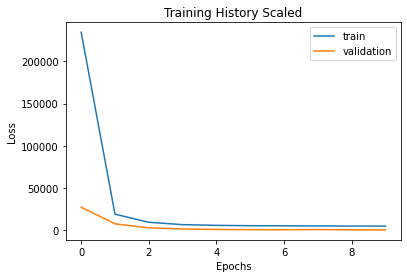

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the architecture of the neural network
model_ann = Sequential([
    Dense(64, input_dim=24, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model_ann.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot the training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.title('Training History Scaled')
# Add labels to the plot
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

95/95 [==============================] - 0s 831us/step - loss: 412.7417
Mean Squared Error on test data:  412.74169921875
95/95 [==============================] - 0s 571us/step


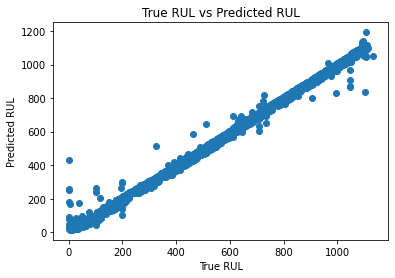

       True RUL  Predicted RUL
8692       1043    1044.265625
4489        956     932.389648
8163        469     468.604828
13837       176     175.429245
7709        943     949.164185
...         ...            ...
4783        645     598.122314
12314       632     623.537964
8962        772     776.668335
5981        491     486.260071
1042         33      43.585888

[3013 rows x 2 columns]


In [56]:
# Evaluate the model
loss = model_ann.evaluate(X_test, y_test)
print("Mean Squared Error on test data: ", loss)

# Make predictions
y_pred = model_ann.predict(X_test)

# Plot the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('True RUL vs Predicted RUL')
plt.show()

# Show true RUL vs predicted RUL
results = pd.DataFrame({'True RUL': y_test, 'Predicted RUL': y_pred.flatten()})
print(results)

## What happens if we don't standardize the data?

In [57]:
# use unscaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# inspect the shape of X_train, X_test, y_train, y_test
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (12051, 9)
X_test shape:  (3013, 9)
y_train shape:  (12051,)
y_test shape:  (3013,)


Epoch 1/10
377/377 [==============================] - 1s 1ms/step - loss: 31564744.0000 - val_loss: 7019992.0000
Epoch 2/10
377/377 [==============================] - 0s 942us/step - loss: 8040425.0000 - val_loss: 4496119.0000
Epoch 3/10
377/377 [==============================] - 0s 1ms/step - loss: 6038332.0000 - val_loss: 2412377.7500
Epoch 4/10
377/377 [==============================] - 0s 981us/step - loss: 2667014.5000 - val_loss: 853171.6875
Epoch 5/10
377/377 [==============================] - 0s 1ms/step - loss: 1210238.8750 - val_loss: 550116.6875
Epoch 6/10
377/377 [==============================] - 0s 1ms/step - loss: 1333031.1250 - val_loss: 808118.3125
Epoch 7/10
377/377 [==============================] - 0s 1ms/step - loss: 521214.6875 - val_loss: 303254.1562
Epoch 8/10
377/377 [==============================] - 0s 973us/step - loss: 386958.4062 - val_loss: 99672.3672
Epoch 9/10
377/377 [==============================] - 1s 1ms/step - loss: 482185.0938 - val_loss: 98158.1

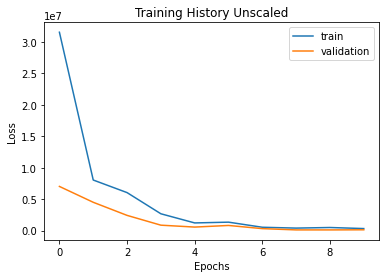

In [58]:
# Define the architecture of the neural network
model_ann = Sequential([
    Dense(64, input_dim=24, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model_ann.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot the training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.title('Training History Unscaled')
# Add labels to the plot
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

95/95 [==============================] - 0s 602us/step - loss: 118496.4219
Mean Squared Error on test data:  118496.421875
95/95 [==============================] - 0s 518us/step


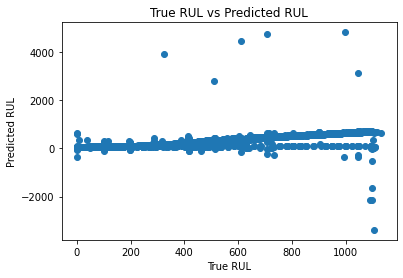

       True RUL  Predicted RUL
8692       1043     676.792236
4489        956     603.668213
8163        469     310.346344
13837       176      96.698799
7709        943     618.890930
...         ...            ...
4783        645     563.506836
12314       632     391.049896
8962        772     504.150482
5981        491     299.475342
1042         33      65.579735

[3013 rows x 2 columns]


In [59]:
# Evaluate the model
loss = model_ann.evaluate(X_test, y_test)
print("Mean Squared Error on test data: ", loss)

# Make predictions
y_pred = model_ann.predict(X_test)

# Plot the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('True RUL vs Predicted RUL')
plt.show()

# Show true RUL vs predicted RUL
results = pd.DataFrame({'True RUL': y_test, 'Predicted RUL': y_pred.flatten()})
print(results)

## T-SNE dimensionality reduction
T-SNE is a dimensionality reduction technique that is particularly well suited for the visualization of high-dimensional datasets. The idea is to project the data from a high-dimensional space into a lower-dimensional space, typically the 2D plane, in such a way that similar samples are mapped to nearby points and dissimilar samples are mapped to distant points. In contrast to PCA, T-SNE is not a mathematical technique, but a probabilistic one. It is based on the minimization of the Kullback-Leibler divergence between the input and the output similarities, which makes it particularly well suited for the visualization of high-dimensional datasets:
$p_{j|i} = \frac{exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \neq i} exp(-||x_i - x_k||^2 / 2\sigma_i^2)}$ and $p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$

/home/thetruehooha/.venvs/vimJupy/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/thetruehooha/.venvs/vimJupy/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


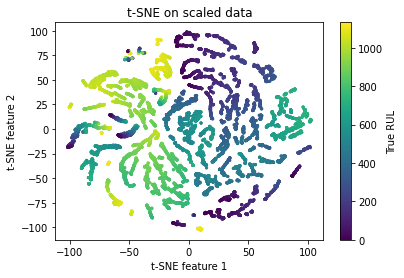

In [62]:
# t-SNE on scaled data
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# plot the t-SNE features, colors being the true RUL
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=5)
plt.title('t-SNE on scaled data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(label='True RUL')
plt.show()

/home/thetruehooha/.venvs/vimJupy/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/thetruehooha/.venvs/vimJupy/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


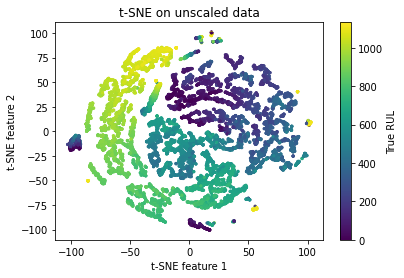

In [64]:
# t-SNE on unscaled data
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# plot the t-SNE features, colors being the true RUL
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=5)
plt.title('t-SNE on unscaled data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(label='True RUL')
plt.show()